In [41]:
import numpy as np
import matplotlib.pyplot as plt
import json
import pprint
import os
import glob

In [92]:


# Set the parent directory path
parent_directory = "C:/Users/lqc/QM_5-28-24" #"path/to/parent/directory"
qubit = 3
target_string = 'ramseycorrelation'

# Use glob to recursively search for files containing the target string
files = glob.glob(f"{parent_directory}/2025-02-1[12]/*{target_string}*", recursive=True)  #[1-2][90]
files = sorted(files, key=os.path.getmtime)  # Time order

file_names = []
for i, file in enumerate(files):
    print(i, file)
    file_names.append(file)

0 C:/Users/lqc/QM_5-28-24\2025-02-11\#62919_e_f_ramseycorrelation_165255
1 C:/Users/lqc/QM_5-28-24\2025-02-11\#62980_e_f_ramseycorrelation_191744
2 C:/Users/lqc/QM_5-28-24\2025-02-11\#63041_e_f_ramseycorrelation_214351
3 C:/Users/lqc/QM_5-28-24\2025-02-11\#63066_e_f_ramseycorrelation_224209
4 C:/Users/lqc/QM_5-28-24\2025-02-12\#63163_e_f_ramseycorrelation_022849
5 C:/Users/lqc/QM_5-28-24\2025-02-12\#63248_e_f_ramseycorrelation_054018
6 C:/Users/lqc/QM_5-28-24\2025-02-12\#63273_e_f_ramseycorrelation_063446
7 C:/Users/lqc/QM_5-28-24\2025-02-12\#63286_e_f_ramseycorrelation_070424
8 C:/Users/lqc/QM_5-28-24\2025-02-12\#63336_e_f_ramseycorrelation_090913
9 C:/Users/lqc/QM_5-28-24\2025-02-12\#63349_e_f_ramseycorrelation_093502
10 C:/Users/lqc/QM_5-28-24\2025-02-12\#63374_e_f_ramseycorrelation_103458
11 C:/Users/lqc/QM_5-28-24\2025-02-12\#63375_e_f_ramseycorrelation_103932
12 C:/Users/lqc/QM_5-28-24\2025-02-12\#63400_e_f_ramseycorrelation_113659


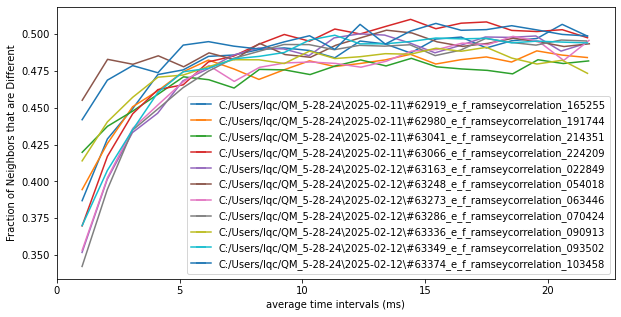

In [78]:
def rolling_correlation(Ithresholded, timestamps, n_max, n_step=1):
    lnr = len(range(1,n_max,n_step))
    avg_delta_ts = np.zeros(lnr)    
    std_delta_ts = np.zeros(lnr)
    fractions = np.zeros(lnr)
    for i_n, n in enumerate(range(1,n_max, n_step)):
        rolling_sum = 0
        rolling_length = 0
        for i in range(n):
            rolling_list = Ithresholded[i::n]
            diffs = np.abs(np.diff(rolling_list))
            rolling_sum += np.sum(diffs)
            rolling_length += len(diffs)

            rolling_times = timestamps[i::n]
            if i ==0:
                tdiffs = np.diff(rolling_times)
            else:
                tdiffs = np.concatenate((tdiffs, np.diff(rolling_times)))
        fractions[i_n] = rolling_sum/rolling_length
        avg_delta_ts[i_n] = np.mean(tdiffs)
        std_delta_ts[i_n] = np.std(tdiffs)
    return fractions, avg_delta_ts, std_delta_ts

fig = plt.figure(figsize=(10,5))
for i_file in range(len(file_names)-1): #
    file_contents = np.load(file_names[i_file]+'/arrays.npz')
    # Open the file and load the data
    with open(file_names[i_file]+'/data.json', 'r') as file:
        data_dict = json.load(file)

    i_threshold = data_dict['RR_CONSTANTS']['q3_re']['ge_threshold']
    I2 = file_contents['measurement_data.q3_re.I']
    ts = file_contents['measurement_data.q3_re.timestamps']
    Ithresholded = np.array([1 if ii[0] > i_threshold else 0 for ii in I2])
    ts = np.array([tt[0]*4 for tt in ts])

    #nth nearest neighbor
    fractions, deltats, stdts = rolling_correlation(Ithresholded, ts, 22,1)
    plt.errorbar(deltats*1e-6, fractions, xerr=stdts, label = file_names[i_file])

plt.xlabel('average time intervals (ms)')
plt.ylabel('Fraction of Neighbors that are Different')
plt.legend()
plt.show()

1500000


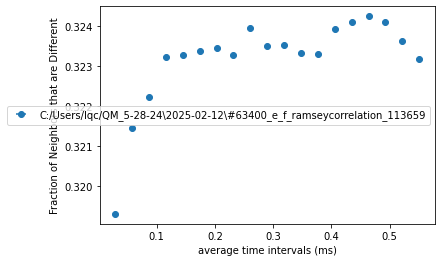

In [94]:
iif=-1
# fn = 'C:/Users/lqc/QM_5-28-24/2025-02-12/#63375_e_f_ramseycorrelation_103932'
fn = file_names[iif]
file_contents = np.load(fn+'/arrays.npz')
# Open the file and load the data
with open(fn+'/data.json', 'r') as file:
    data_dict = json.load(file)

i_threshold = data_dict['RR_CONSTANTS']['q3_re']['ge_threshold']
I2 = file_contents['measurement_data.q3_re.I']
print(len(I2))
ts = file_contents['measurement_data.q3_re.timestamps']
Ithresholded = np.array([1 if ii[0] > i_threshold else 0 for ii in I2])
ts = np.array([tt[0]*4 for tt in ts])

#nth nearest neighbor
fractions, deltats, stdts = rolling_correlation(Ithresholded, ts, 20,1)
plt.errorbar(deltats*1e-6, fractions, xerr=stdts*1e-6, label = file_names[iif], linestyle='none', fmt='o')
plt.xlabel('average time intervals (ms)')
plt.ylabel('Fraction of Neighbors that are Different')
plt.legend()
plt.show()

50